The first thing i want to do, is import the different data to the note book, using pandas. and make it show the dates.

In [28]:
import pandas as pd

trips=pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/trips.csv', parse_dates=True)

trips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46510 entries, 0 to 46509
Data columns (total 11 columns):
Unnamed: 0      46510 non-null int64
username        46510 non-null object
country         46473 non-null object
country_code    45909 non-null object
country_slug    46473 non-null object
date_end        46335 non-null object
date_start      46510 non-null object
latitude        46510 non-null int64
longitude       46510 non-null int64
place           46510 non-null object
place_slug      46473 non-null object
dtypes: int64(3), object(8)
memory usage: 3.9+ MB


Then i want to tranform the dates in to timestamps, using transform and  coerce for the faulty dates

In [29]:
trips['date_end']=pd.to_datetime(trips['date_end'], errors='coerce')
trips['date_start']=pd.to_datetime(trips['date_start'], errors='coerce')

trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46510 entries, 0 to 46509
Data columns (total 11 columns):
Unnamed: 0      46510 non-null int64
username        46510 non-null object
country         46473 non-null object
country_code    45909 non-null object
country_slug    46473 non-null object
date_end        46292 non-null datetime64[ns]
date_start      46499 non-null datetime64[ns]
latitude        46510 non-null int64
longitude       46510 non-null int64
place           46510 non-null object
place_slug      46473 non-null object
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 3.9+ MB


now i want to calculate the duration of the trips in days.


In [30]:
trips['days_duration']= trips['date_end']-trips['date_start']

trips.head()



,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11 days
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3 days
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4 days
3,3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan,14 days
4,4,@waylandchin,China,CN,china,2017-03-18,2017-02-17,40,122,Yingkou,china,29 days


Now the data needs to be cleaned, this means dropping outliers and removing NaNs. Before doing this the relevant data needs to be changed into the int data type 


In [31]:
trips.dropna(subset=['date_end', 'date_start', 'days_duration'], inplace=True)

trips['days_duration']=trips.apply(lambda x: x['days_duration'].days, axis=1)

trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46282 entries, 0 to 46509
Data columns (total 12 columns):
Unnamed: 0       46282 non-null int64
username         46282 non-null object
country          46245 non-null object
country_code     45684 non-null object
country_slug     46245 non-null object
date_end         46282 non-null datetime64[ns]
date_start       46282 non-null datetime64[ns]
latitude         46282 non-null int64
longitude        46282 non-null int64
place            46282 non-null object
place_slug       46245 non-null object
days_duration    46282 non-null int64
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 4.6+ MB


In [32]:
#removing trips that start in the future 
far_future=trips['date_start'].dt.year<2020
trips=trips[far_future]
#removing trips that har to short
minimum_days=trips['days_duration']>0
trips=trips[minimum_days]
#removing trips that are to long
max_days=trips['days_duration']<365
trips=trips[max_days]

trips.head()

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4
3,3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan,14
4,4,@waylandchin,China,CN,china,2017-03-18,2017-02-17,40,122,Yingkou,china,29


now that the outliers have been removed, the country list will be joined to the trips data, and datetime index be set to start date af a trip


In [33]:
country=pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/countrylist.csv'
, parse_dates=True)

country.head()



,alpha_2,region,sub_region
0,AF,Asia,Southern Asia
1,AX,Europe,Northern Europe
2,AL,Europe,Southern Europe
3,DZ,Africa,Northern Africa
4,AS,Oceania,Polynesia


In [34]:
#in order to merge trips with country it is needed to rename the aplha_2 to country_code
country.rename(columns={'alpha_2':'country_code'}, inplace=True)



trips=pd.merge(trips, country, on='country_code')

trips.head()

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration,region,sub_region
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11,Americas,Latin America and the Caribbean
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3,Americas,Latin America and the Caribbean
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4,Americas,Latin America and the Caribbean
3,62,@jtompl,Mexico,MX,mexico,2017-09-25,2017-09-10,19,-99,Mexico City,mexico-city-mexico,15,Americas,Latin America and the Caribbean
4,63,@jtompl,Mexico,MX,mexico,2017-09-10,2017-09-01,20,-87,Tulum,tulum-mexico,9,Americas,Latin America and the Caribbean


In [0]:
#last the datetime index will be set to the start date of a trip

trips.index=trips['date_start']



In [53]:

trips.head()

,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration,region,sub_region
date_start,,,,,,,,,,,,,
2018-06-04,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11,Americas,Latin America and the Caribbean
2018-05-31,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3,Americas,Latin America and the Caribbean
2017-11-01,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4,Americas,Latin America and the Caribbean
2017-09-10,@jtompl,Mexico,MX,mexico,2017-09-25,2017-09-10,19,-99,Mexico City,mexico-city-mexico,15,Americas,Latin America and the Caribbean
2017-09-01,@jtompl,Mexico,MX,mexico,2017-09-10,2017-09-01,20,-87,Tulum,tulum-mexico,9,Americas,Latin America and the Caribbean


Now i am going to look at something else than the trips data, for a moment. 
i will instead explore some information in the people data that i will shortly import. the questions to answear is the following.

a. How many people have at least a “High School” diploma?

b. How many people working with “Software Dev” have a “Master's Degree”?
 
c. Who is the person with a Master's Degree that has the highest number of followers?


In [54]:
people=pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/people.csv', parse_dates=True)

people.head()

,Unnamed: 0,username,followers,following,work_raw,education_raw
0,0,@lewellenmichael,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
1,1,@waylandchin,0,2,NaN,NaN
2,2,@karan,2,1,NaN,NaN
3,3,@skaboss217,0,1,NaN,NaN
4,4,@apwn,17,426,Web Dev,NaN


In [55]:
#Now to get an overview over the data, a few looks at the different types and more. 

people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 6 columns):
Unnamed: 0       4016 non-null int64
username         4016 non-null object
followers        4016 non-null int64
following        4016 non-null int64
work_raw         1582 non-null object
education_raw    451 non-null object
dtypes: int64(3), object(3)
memory usage: 188.3+ KB


In [56]:
#As it is apparent, that some of the rows, are missing the data that is needed, these will be dropped.

people.dropna(subset=['education_raw'], inplace=True)

people.head()

,Unnamed: 0,username,followers,following,work_raw,education_raw
0,0,@lewellenmichael,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
7,7,@jtompl,2,3,"Web Dev, Software Dev, Startup Founder, Produc...","High School, Bachelor's Degree, Master's Degree"
14,14,@jaszczakw,0,1,"Web Dev, Software Dev",Master's Degree
15,15,@anigupta,9,6,"Web Dev, Software Dev, Startup Founder, Produc...","High School, Bachelor's Degree"
16,16,@adventureinmyveins,3,3,"Web Dev, Startup Founder","High School, Bachelor's Degree"


In [57]:
#now to count the different number of educations in the data and answear question a.(answear 130)
highschool_count=people['education_raw'].str.contains('High School')
highschool_count.sum()

130

In [58]:
#now for the answear to question B i need to define what parameters i want to find, and count the number rows where both are present.
education=people['education_raw'].str.contains("Master's Degree")
work=people['work_raw'].str.contains('Software Dev')

#using the .shape function set to 0 gives the number of rows with both parameters
people[education & work].shape[0]


57

In [59]:
#to find the Master's Degree with the most followers i do the following
people[education].sort_values('followers', ascending=False).head(1)

,Unnamed: 0,username,followers,following,work_raw,education_raw
2043,2043,@levelsio,2182,353,"Software Dev, Startup Founder, Creative","High School, Bachelor's Degree, Master's Degree"


The last thing i will do, is go trough some questions relating to the trips data, that i preprosessed earlier. the questions is as follows. 

a. Which country received the highest number of trips?

b. Which country received the highest number of trips in 2017?

c. Which is the country in 'Eastern Asia' where travellers spent on average least time when going there? Provide a visualization.

d. Do nomads that indicate working in “Software Dev” tend to have shorter or longer trips on average?

e. Visualize over-time median trip duration overall (bonus: and split by world-region).


In [60]:
#in order to find the country that has the most trips, i group the data by country and sort it by country code, to find out how many trips have been made to it. 
trips.groupby('country').count().sort_values('country_code', ascending=False).head(10)

,username,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration,region,sub_region
country,,,,,,,,,,,,
United States,7095,7088,7095,7095,7095,7095,7095,7095,7095,7095,7095,7095
Thailand,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294
Spain,1897,1896,1897,1897,1897,1897,1897,1897,1897,1897,1897,1897
Germany,1839,1836,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839
France,1411,1411,1411,1411,1411,1411,1411,1411,1411,1411,1411,1411
Indonesia,1312,1311,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312
China,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074
Italy,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049
Netherlands,1011,1010,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011


In [61]:
#in order to find the country with the most trips in 2017 i do the same as last time, but with new parameters.

start_date= trips['date_start'].dt.year==2017

trips[start_date].groupby('country').count().sort_values('country_code', ascending=False).head(10)


,username,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration,region,sub_region
country,,,,,,,,,,,,
United States,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844
Thailand,894,894,894,894,894,894,894,894,894,894,894,894
Spain,603,603,603,603,603,603,603,603,603,603,603,603
Germany,458,458,458,458,458,458,458,458,458,458,458,458
France,391,391,391,391,391,391,391,391,391,391,391,391
Indonesia,376,376,376,376,376,376,376,376,376,376,376,376
Vietnam,357,357,357,357,357,357,357,357,357,357,357,357
Mexico,317,317,317,317,317,317,317,317,317,317,317,317
Portugal,305,305,305,305,305,305,305,305,305,305,305,305


In [62]:
#first i make a subset of the eastern asia region 
trips_asia=trips['sub_region']== 'Eastern Asia'
#this i group it, take the mean and sort is, in order to find the lowest mean country (north korea)
trips[trips_asia].groupby('country').mean().sort_values('days_duration', ascending=False).tail(5)

,latitude,longitude,days_duration
country,,,
Mongolia,46.611111,105.833333,21.277778
Hong Kong,22.000000,114.000000,18.500000
Japan,34.711951,136.908069,17.037794
China,26.756052,114.633147,16.959963
North Korea,39.111111,124.888889,4.000000


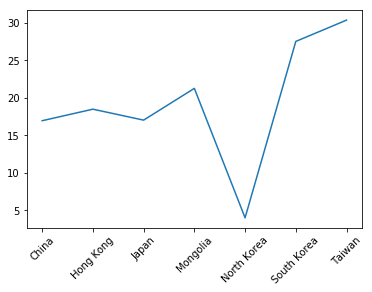

In [68]:
#in order to make a plot over the east asia subset i import matplotlib.pyplot and make it plot the data. 
import matplotlib.pyplot as plt

plot_asia=trips[trips_asia].groupby("country").mean()['days_duration']

plt.plot(plot_asia)
#rotates the country names to make it readable 
plt.xticks(rotation=45)

plt.show()

In [71]:
#in order to see if software devs make longer or shorter trips in avarage, i merge the two data sets on username
trips=pd.merge(trips, people, on='username')

trips.head()

,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,days_duration,region,sub_region,Unnamed: 0,followers,following,work_raw,education_raw
0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico,11,Americas,Latin America and the Caribbean,0,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico,3,Americas,Latin America and the Caribbean,0,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico,4,Americas,Latin America and the Caribbean,0,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan,14,Asia,Western Asia,0,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
4,@jtompl,Mexico,MX,mexico,2017-09-25,2017-09-10,19,-99,Mexico City,mexico-city-mexico,15,Americas,Latin America and the Caribbean,7,2,3,"Web Dev, Software Dev, Startup Founder, Produc...","High School, Bachelor's Degree, Master's Degree"


In [72]:
#before i can tell if software devs have longer or shorter trips on avarage i need the mean of them all
trips.days_duration.mean()

19.314468121818653

In [0]:
#in order to see if software devs take shorter trips, the trips data is made to a subset with the work_raw and selected
da_work=trips.dropna(subset=['work_raw'])

work=da_work['work_raw'].str.contains('Software Dev')


In [87]:
#it appears that software devs have shorter trips 
da_work[work].mean()['days_duration']

19.19373732822708

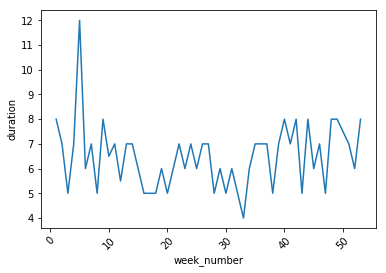

In [94]:


trips['week']=trips['date_start'].dt.week

data_plot=trips.groupby('week').median()['days_duration']
plt.plot(data_plot2,)
plt.xticks(rotation=45)
plt.xlabel('week_number')
plt.ylabel('duration')
plt.show()